In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("bank.csv")

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [5]:
data.info

<bound method DataFrame.info of       age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  dura

In [6]:
data.shape

(4521, 17)

In [7]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [8]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [9]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [10]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    if column != 'deposit':
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])

In [14]:
data['deposit'] = data['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

In [15]:
x=data.drop(columns=["deposit"])

In [16]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1


In [17]:
y=data["deposit"]

In [18]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: deposit, Length: 4521, dtype: int64

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.6438186128844526, 0.9761904761904762, 'x[11] <= 561.0\ngini = 0.206\nsamples = 3164\nvalue = [2795, 369]'),
 Text(0.40118124382759596, 0.9285714285714286, 'x[11] <= 211.5\ngini = 0.142\nsamples = 2825\nvalue = [2607, 218]'),
 Text(0.21995890942437923, 0.8809523809523809, 'x[0] <= 70.5\ngini = 0.057\nsamples = 1783\nvalue = [1731, 52]'),
 Text(0.18664468115124153, 0.8333333333333334, 'x[0] <= 20.0\ngini = 0.051\nsamples = 1765\nvalue = [1719, 46]'),
 Text(0.16744497742663658, 0.7857142857142857, 'x[5] <= 51.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.16383323927765236, 0.7380952380952381, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.17105671557562077, 0.7380952380952381, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.2058443848758465, 0.7857142857142857, 'x[10] <= 9.5\ngini = 0.049\nsamples = 1762\nvalue = [1718, 44]'),
 Text(0.17828019187358918, 0.7380952380952381, 'x[13] <= 375.5\ngini = 0.042\nsamples = 1718\nvalue = [1681, 37]'),
 Text(0.1484339729119

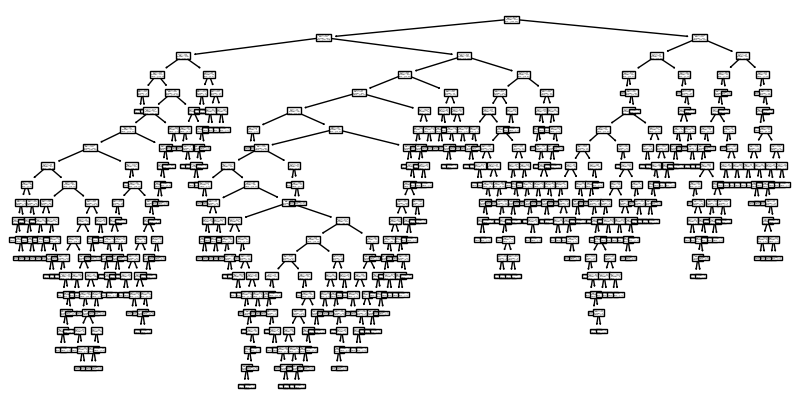

In [22]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(10,5))
tree.plot_tree(clf)

In [23]:
y_pred = clf.predict(x_test)

In [24]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score,classification_report

In [26]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8540899042004422


In [27]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1205
           1       0.35      0.35      0.35       152

    accuracy                           0.85      1357
   macro avg       0.63      0.63      0.63      1357
weighted avg       0.85      0.85      0.85      1357

